## Pandas Intro

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
titanic = pd.read_csv(url, index_col='Name')

In [3]:
# print the first 5 lines of the dataframe
titanic.head()

# print summary statistics for each column
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
print(titanic.groupby("Survived")["Age"].mean())

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


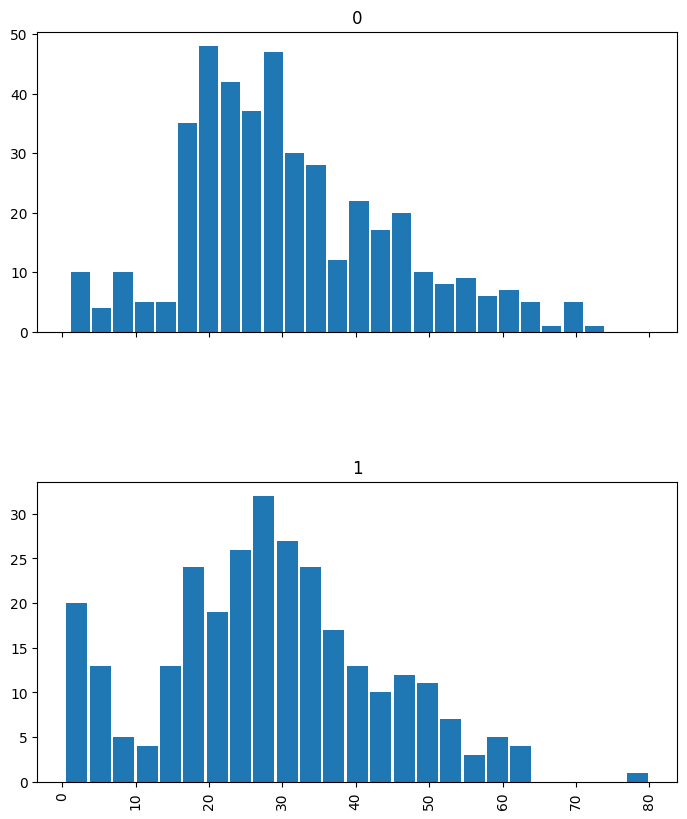

In [5]:
titanic.hist(column='Age', by='Survived', bins=25, figsize=(8,10),
             layout=(2,1), zorder=2, sharex=True, rwidth=0.9);

In [6]:
titanic.hist?

Signature:
titanic.hist(
    column: 'IndexLabel' = None,
    by=None,
    grid: 'bool' = True,
    xlabelsize: 'int | None' = None,
    xrot: 'float | None' = None,
    ylabelsize: 'int | None' = None,
    yrot: 'float | None' = None,
    ax=None,
    sharex: 'bool' = False,
    sharey: 'bool' = False,
    figsize: 'tuple[int, int] | None' = None,
    layout: 'tuple[int, int] | None' = None,
    bins: 'int | Sequence[int]' = 10,
    backend: 'str | None' = None,
    legend: 'bool' = False,
    **kwargs,
)
Docstring:
Make a histogram of the DataFrame's columns.

A `histogram`_ is a representation of the distribution of data.
This function calls :meth:`matplotlib.pyplot.hist`, on each series in
the DataFrame, resulting in one histogram per column.

.. _histogram: https://en.wikipedia.org/wiki/Histogram

Parameters
----------
data : DataFrame
    The pandas object holding the data.
column : str or sequence, optional
    If passed, will be used to limit data to a subset of columns.
by : o

In [7]:
# print some information about the columns
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [8]:
titanic["Age"]
titanic.Age          # same as above
type(titanic["Age"])

pandas.core.series.Series

In [9]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
titanic.index

Index(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       ...
       'Markun, Mr. Johann', 'Dahlberg, Miss. Gerda Ulrika',
       'Banfield, Mr. Frederick James', 'Sutehall, Mr. Henry Jr',
       'Rice, Mrs. William (Margaret Norton)', 'Montvila, Rev. Juozas',
       'Graham, Miss. Margaret Edith',
       'Johnston, Miss. Catherine Helen "Carrie"', 'Behr, Mr. Karl Howell',
       'Dooley, Mr. Patrick'],
      dtype='object', name='Name', length=891)

In [11]:
titanic.loc['Lam, Mr. Ali',"Age"]          # select single value by row and column
titanic.loc[:'Lam, Mr. Ali',"Age"]         # slice the dataframe by row and column *names*
titanic.iloc[0:2,3:6]                      # same slice as above by row and column *numbers*

titanic.at['Lam, Mr. Ali',"Age"] = 42      # set single value by row and column *name* (fast)
titanic.at['Lam, Mr. Ali',"Age"]           # select single value by row and column *name* (fast)
titanic.at['Lam, Mr. Ali',"Age"] = 42      # set single value by row and column *name* (fast)
titanic.iat[0,5]                           # select same value by row and column *number* (fast)

titanic["is_passenger"] = True             # set a whole column

In [12]:
titanic[titanic["Age"] > 70]
# ".str" creates a string object from a column
titanic[titanic.index.str.contains("Margaret")]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_passenger
Name,,,,,,,,,,,,
"Devaney, Miss. Margaret Delia",45,1,3,female,19.0,0,0,330958,7.8792,NaN,Q,True
"Brown, Mrs. James Joseph (Margaret Tobin)",195,1,1,female,44.0,0,0,PC 17610,27.7208,B4,C,True
"Madigan, Miss. Margaret ""Maggie""",199,1,3,female,NaN,0,0,370370,7.7500,NaN,Q,True
"Fleming, Miss. Margaret",307,1,1,female,NaN,0,0,17421,110.8833,NaN,C,True
"Hays, Miss. Margaret Bechstein",311,1,1,female,24.0,0,0,11767,83.1583,C54,C,True
"Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)",320,1,1,female,40.0,1,1,16966,134.5000,E34,C,True
"Burns, Miss. Elizabeth Margaret",338,1,1,female,41.0,0,0,16966,134.5000,E40,C,True
"Ford, Miss. Doolina Margaret ""Daisy""",437,0,3,female,21.0,2,2,W./C. 6608,34.3750,NaN,S,True
"Murphy, Miss. Margaret Jane",613,1,3,female,NaN,1,0,367230,15.5000,NaN,Q,True


In [13]:
titanic.isna()                    # returns boolean mask of NaN values
titanic.dropna()                  # drop missing values
titanic.dropna(how="any")         # or how="all"
titanic.dropna(subset=["Cabin"])  # only drop NaNs from one column
titanic.fillna(0)                 # replace NaNs with zero
titanic.fillna(method='ffill')    # forward-fill NaNs

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_passenger
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,True
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,True
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S,True
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,C123,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,C50,S,True
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S,True
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,19.0,1,2,W./C. 6607,23.4500,B42,S,True


## Exercise 1

In [14]:
titanic.iloc?

Type:        property
String form: <property object at 0x000002B4CBC1AE00>
Docstring:  
Purely integer-location based indexing for selection by position.

``.iloc[]`` is primarily integer position based (from ``0`` to
``length-1`` of the axis), but may also be used with a boolean
array.

Allowed inputs are:

- An integer, e.g. ``5``.
- A list or array of integers, e.g. ``[4, 3, 0]``.
- A slice object with ints, e.g. ``1:7``.
- A boolean array.
- A ``callable`` function with one argument (the calling Series or
  DataFrame) and that returns valid output for indexing (one of the above).
  This is useful in method chains, when you don't have a reference to the
  calling object, but would like to base your selection on some value.
- A tuple of row and column indexes. The tuple elements consist of one of the
  above inputs, e.g. ``(0, 1)``.

``.iloc`` will raise ``IndexError`` if a requested indexer is
out-of-bounds, except *slice* indexers which allow out-of-bounds
indexing (this conforms w

In [15]:
titanic.iloc[:10]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_passenger
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,True
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S,True
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,True
"Moran, Mr. James",6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,True
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S,True
"Palsson, Master. Gosta Leonard",8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,True
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,True


In [16]:
titanic.iloc[:10]["Age"].mean()

28.11111111111111

In [17]:
avg_age = titanic.iloc[:10]["Age"].mean()

In [18]:
titanic["Survived"]

Name
Braund, Mr. Owen Harris                                0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               0
                                                      ..
Montvila, Rev. Juozas                                  0
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               0
Behr, Mr. Karl Howell                                  1
Dooley, Mr. Patrick                                    0
Name: Survived, Length: 891, dtype: int64

In [20]:
titanic["Survived"]>0

Name
Braund, Mr. Owen Harris                                False
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     True
Heikkinen, Miss. Laina                                  True
Futrelle, Mrs. Jacques Heath (Lily May Peel)            True
Allen, Mr. William Henry                               False
                                                       ...  
Montvila, Rev. Juozas                                  False
Graham, Miss. Margaret Edith                            True
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                   True
Dooley, Mr. Patrick                                    False
Name: Survived, Length: 891, dtype: bool

In [22]:
titanic["Age"] < avg_age

Name
Braund, Mr. Owen Harris                                 True
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    False
Heikkinen, Miss. Laina                                  True
Futrelle, Mrs. Jacques Heath (Lily May Peel)           False
Allen, Mr. William Henry                               False
                                                       ...  
Montvila, Rev. Juozas                                   True
Graham, Miss. Margaret Edith                            True
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                   True
Dooley, Mr. Patrick                                    False
Name: Age, Length: 891, dtype: bool

In [23]:
titanic["Age"] < titanic.iloc[:]["Age"].mean()

Name
Braund, Mr. Owen Harris                                 True
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    False
Heikkinen, Miss. Laina                                  True
Futrelle, Mrs. Jacques Heath (Lily May Peel)           False
Allen, Mr. William Henry                               False
                                                       ...  
Montvila, Rev. Juozas                                   True
Graham, Miss. Margaret Edith                            True
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                   True
Dooley, Mr. Patrick                                    False
Name: Age, Length: 891, dtype: bool

In [24]:
titanic["Age"] < avg_age

Name
Braund, Mr. Owen Harris                                 True
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    False
Heikkinen, Miss. Laina                                  True
Futrelle, Mrs. Jacques Heath (Lily May Peel)           False
Allen, Mr. William Henry                               False
                                                       ...  
Montvila, Rev. Juozas                                   True
Graham, Miss. Margaret Edith                            True
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                   True
Dooley, Mr. Patrick                                    False
Name: Age, Length: 891, dtype: bool

In [25]:
avg_age = titanic.iloc[:]["Age"].mean()

In [26]:
avg_age

29.716321678321677

In [27]:
# bool index < avg_age
titanic["Age"] < avg_age

Name
Braund, Mr. Owen Harris                                 True
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    False
Heikkinen, Miss. Laina                                  True
Futrelle, Mrs. Jacques Heath (Lily May Peel)           False
Allen, Mr. William Henry                               False
                                                       ...  
Montvila, Rev. Juozas                                   True
Graham, Miss. Margaret Edith                            True
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                   True
Dooley, Mr. Patrick                                    False
Name: Age, Length: 891, dtype: bool

In [28]:
# survived tag for the ones < avg_age
titanic[titanic["Age"] < avg_age]["Survived"]

Name
Braund, Mr. Owen Harris                              0
Heikkinen, Miss. Laina                               1
Palsson, Master. Gosta Leonard                       0
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    1
Nasser, Mrs. Nicholas (Adele Achem)                  1
                                                    ..
Banfield, Mr. Frederick James                        0
Sutehall, Mr. Henry Jr                               0
Montvila, Rev. Juozas                                0
Graham, Miss. Margaret Edith                         1
Behr, Mr. Karl Howell                                1
Name: Survived, Length: 384, dtype: int64

In [29]:
# chance of surviving below avg_age
titanic[titanic["Age"] < avg_age]["Survived"].mean()

0.40625

In [30]:
# chance of surviving above avg_age
titanic[titanic["Age"] > avg_age]["Survived"].mean()

0.4078549848942598

## Tidy data

In [31]:
import pandas as pd

In [32]:
runners = pd.DataFrame([
              {'Runner': 'Runner 1', 400: 64, 800: 128, 1200: 192, 1500: 240},
              {'Runner': 'Runner 2', 400: 80, 800: 160, 1200: 240, 1500: 300},
              {'Runner': 'Runner 3', 400: 96, 800: 192, 1200: 288, 1500: 360},
          ])

In [33]:
runners

,Runner,400,800,1200,1500
0,Runner 1,64,128,192,240
1,Runner 2,80,160,240,300
2,Runner 3,96,192,288,360


In [34]:
runners = pd.melt(runners, id_vars="Runner",
              value_vars=[400, 800, 1200, 1500],
              var_name="distance",
              value_name="time"
          )

In [35]:
runners

,Runner,distance,time
0,Runner 1,400,64
1,Runner 2,400,80
2,Runner 3,400,96
3,Runner 1,800,128
4,Runner 2,800,160
5,Runner 3,800,192
6,Runner 1,1200,192
7,Runner 2,1200,240
8,Runner 3,1200,288
9,Runner 1,1500,240


In [36]:
age = pd.DataFrame([
    {"Runner": "Runner 4", "Age": 18},
    {"Runner": "Runner 2", "Age": 21},
    {"Runner": "Runner 1", "Age": 23},
    {"Runner": "Runner 3", "Age": 19},
])

In [37]:
age

,Runner,Age
0,Runner 4,18
1,Runner 2,21
2,Runner 1,23
3,Runner 3,19


In [38]:
# Add the age for each runner
runners.merge(age, on="Runner")

,Runner,distance,time,Age
0,Runner 1,400,64,23
1,Runner 1,800,128,23
2,Runner 1,1200,192,23
3,Runner 1,1500,240,23
4,Runner 2,400,80,21
5,Runner 2,800,160,21
6,Runner 2,1200,240,21
7,Runner 2,1500,300,21
8,Runner 3,400,96,19
9,Runner 3,800,192,19


In [39]:
titanic["Child"] = titanic["Age"] < 12

In [40]:
titanic["Child"]

Name
Braund, Mr. Owen Harris                                False
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    False
Heikkinen, Miss. Laina                                 False
Futrelle, Mrs. Jacques Heath (Lily May Peel)           False
Allen, Mr. William Henry                               False
                                                       ...  
Montvila, Rev. Juozas                                  False
Graham, Miss. Margaret Edith                           False
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                  False
Dooley, Mr. Patrick                                    False
Name: Child, Length: 891, dtype: bool

In [41]:
titanic.groupby(["Sex", "Child"])["Survived"].mean()

Sex     Child
female  False    0.758865
        True     0.593750
male    False    0.164510
        True     0.555556
Name: Survived, dtype: float64

## Exercise 2

In [67]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_passenger,Child
Name,,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,True,False
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S,True,False
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,True,False
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S,True,False
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,True,False


In [68]:
titanic["SibSp"]

Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               0
                                                      ..
Montvila, Rev. Juozas                                  0
Graham, Miss. Margaret Edith                           0
Johnston, Miss. Catherine Helen "Carrie"               1
Behr, Mr. Karl Howell                                  0
Dooley, Mr. Patrick                                    0
Name: SibSp, Length: 891, dtype: int64

In [69]:
# number of person in each family
titanic["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [70]:
biggest = max(titanic["SibSp"].unique())

In [71]:
#What are the names of the people in the largest family group?, Index is the name in this instance
titanic[titanic["SibSp"] == biggest].index

Index(['Sage, Master. Thomas Henry', 'Sage, Miss. Constance Gladys',
       'Sage, Mr. Frederick', 'Sage, Mr. George John Jr',
       'Sage, Miss. Stella Anna', 'Sage, Mr. Douglas Bullen',
       'Sage, Miss. Dorothy Edith "Dolly"'],
      dtype='object', name='Name')

In [72]:
titanic["Fare"]

Name
Braund, Mr. Owen Harris                                 7.2500
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    71.2833
Heikkinen, Miss. Laina                                  7.9250
Futrelle, Mrs. Jacques Heath (Lily May Peel)           53.1000
Allen, Mr. William Henry                                8.0500
                                                        ...   
Montvila, Rev. Juozas                                  13.0000
Graham, Miss. Margaret Edith                           30.0000
Johnston, Miss. Catherine Helen "Carrie"               23.4500
Behr, Mr. Karl Howell                                  30.0000
Dooley, Mr. Patrick                                     7.7500
Name: Fare, Length: 891, dtype: float64

In [73]:
titanic["Fare"].loc["Braund, Mr. Owen Harris"]

7.25

array([<AxesSubplot: title={'center': 'Poor'}>,
       <AxesSubplot: title={'center': 'Rich'}>], dtype=object)

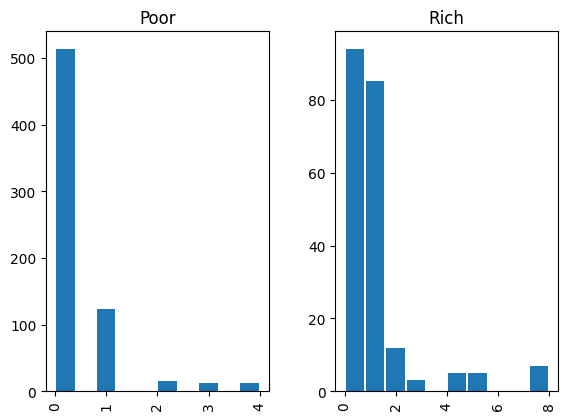

In [74]:
# x itterates over all names in SibSp, where the function checks if this name belongs in Poor/Rich
titanic.hist("SibSp",
             lambda x: "Poor" if titanic["Fare"].loc[x] < titanic["Fare"].mean() else "Rich",
             rwidth=0.9)

## Time series superpowers

In [77]:
# File → Open from URL → enter https://api.nobelprize.org/v1/laureate.csv
# This opens it in JupyterLab but also saves it as laureate.csv
nobel = pd.read_csv("laureate.csv")
nobel.head()

FileNotFoundError: [Errno 2] No such file or directory: 'laureate.csv'

In [ ]:
# the errors='coerce' argument is needed because the dataset is a bit messy
nobel["born"] = pd.to_datetime(nobel["born"], errors ='coerce')
nobel["died"] = pd.to_datetime(nobel["died"], errors ='coerce')
nobel["year"] = pd.to_datetime(nobel["year"], format="%Y")

In [ ]:
print(nobel["born"].dt.day)
print(nobel["born"].dt.year)
print(nobel["born"].dt.weekday)

In [ ]:
nobel["lifespan"] = round((nobel["died"] - nobel["born"]).dt.days / 365, 1)

In [ ]:
nobel.hist(column='lifespan', bins=25, figsize=(8,10), rwidth=0.9)

In [ ]:
nobel.boxplot(column="lifespan", by="category")